<a href="https://colab.research.google.com/github/wonmyeong/olive-young/blob/master/SVM_oliveyoung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tweepy==3.10

In [ ]:
try:
    import konlpy
except:
    !pip install -q konlpy
    import konlpy

import pandas as pd
import numpy as np

konlpy.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 28.8 MB/s eta 0:00:00


'0.6.0'

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!pip install wordcloud

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# data_df = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//concat_review_df")
data_df = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//7500_concat_review_df")
data_df.drop(columns=["Unnamed: 0"],inplace=True)
from konlpy.tag import Okt
okt = Okt()
def clean_text(text):
      tokens = okt.pos(text)
      # 조사, 구두점, 알파벳을 제외
      tokens = [(word, pos) for word, pos in tokens if pos not in ['Josa', 'Punctuation', 'Alpha']]
      # Extract only the words from the first element of each tuple
      words = [word for word, _ in tokens]

      # Join the words together to form a sentence
      cleaned_text = ' '.join(words)  # 공백 없이 한글 단어들을 연결합니다.

      return cleaned_text


data_df['review'] = data_df['review'].apply(lambda x: clean_text(x))

text_test = data_df['review'].values
y_test = data_df['label'].values

In [ ]:
data_df.head()

,review,label
0,유통 기한 넉넉하고,1
1,구성 많아서 선물 하기 좋네요,1
2,구성 알차고,1
3,촉촉하고 너무 좋아용,1
4,대 용량 넉넉하게 사용 할 수 있고,1


In [ ]:
from konlpy.tag import Okt

class PicklableOkt(Okt):
    def __init__(self, *args):
        self.args = args
        Okt.__init__(self, *args)

    def __getstate__(self):
        return {'args': self.args}

    def __setstate__(self, state):
        self.__init__(*state['args'])


###SVC RBF 커널 활용  모델 학습


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# 직렬화 가능한 PickableOkt 사용하여 파이프라인 생성
param_grid = {
    'tfidfvectorizer__min_df': [1,3,5],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 0.01, 0.001]
}

pipe = make_pipeline(TfidfVectorizer(tokenizer=PicklableOkt().morphs), SVC(kernel='rbf'))
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(tokenizer=<bound method Okt.morphs of <__main__.PicklableOkt object at 0x7aef60adbd90>>)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': [0.1, 0.01, 0.001],
                         'tfidfvectorizer__min_df': [1, 3, 5],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [ ]:
print("최적의 교차 검증 점수 : {:.2f}".format(grid.best_score_))
print("최적의 매개변수 : \n",grid.best_params_)

###최적 파라미터로 히트맵과 특성별 기울기 값 시각화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# 직렬화 가능한 PickableOkt 사용하여 파이프라인 생성
param_grid = {
    'tfidfvectorizer__min_df': [1],
    'tfidfvectorizer__ngram_range': [(1, 2)],
    'svc__C': [10],
    'svc__gamma': [0.1]
}

pipe = make_pipeline(TfidfVectorizer(tokenizer=PicklableOkt().morphs), SVC(kernel='rbf'))
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(tokenizer=<bound method Okt.morphs of <__main__.PicklableOkt object at 0x7b7cbec573d0>>)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [10], 'svc__gamma': [0.1],
                         'tfidfvectorizer__min_df': [1],
                         'tfidfvectorizer__ngram_range': [(1, 2)]})

In [ ]:
print("최적의 교차 검증 점수 : {:.2f}".format(grid.best_score_))
print("최적의 매개변수 : \n",grid.best_params_)

최적의 교차 검증 점수 : 0.91
최적의 매개변수 : 
 {'svc__C': 10, 'svc__gamma': 0.1, 'tfidfvectorizer__min_df': 1, 'tfidfvectorizer__ngram_range': (1, 2)}


In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.9 MB/s eta 0:00:00


In [ ]:
import mglearn

scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T

In [ ]:
scores

array([[0.779     , 0.8026    , 0.808     , 0.57946667, 0.5888    ,
        0.59293333, 0.57986667, 0.58906667, 0.5932    , 0.87846667,
        0.87733333, 0.87      , 0.80113333, 0.813     , 0.8154    ,
        0.57986667, 0.58906667, 0.5932    , 0.9032    , 0.89      ,
        0.88066667, 0.87993333, 0.87733333, 0.87066667, 0.80313333,
        0.8142    , 0.816     ],
       [0.68386667, 0.7588    , 0.78353333, 0.55626667, 0.5882    ,
        0.6078    , 0.5566    , 0.5894    , 0.60873333, 0.88      ,
        0.884     , 0.8742    , 0.71246667, 0.78813333, 0.80386667,
        0.5566    , 0.5894    , 0.60873333, 0.91473333, 0.90153333,
        0.8878    , 0.88366667, 0.88593333, 0.87493333, 0.716     ,
        0.79106667, 0.80566667],
       [0.6474    , 0.74446667, 0.77506667, 0.54893333, 0.57773333,
        0.59686667, 0.54913333, 0.57853333, 0.5976    , 0.87206667,
        0.88333333, 0.87486667, 0.66853333, 0.77366667, 0.79626667,
        0.54913333, 0.57853333, 0.5976    , 0.9144

In [ ]:
#매개변수 히트맵
# import mglearn

# scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
# heatmap = mglearn.tools.heatmap(
#     scores,xlabel="C",ylabel="gamma", cmap="viridis",fmt="%.3f",
#     xticklabels = param_grid["svc__C"],
#     yticklabels = param_grid["svc__gamma"]

# )

# plt.title("SVC with TF-IDF")
# plt.show()



In [ ]:
final_olive_review = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//final_olive_review_data_df")
final_olive_review.drop(columns={"Unnamed: 0"},inplace=True)
print("중복 제거 전 : ", final_olive_review.shape)
#리뷰 내용이 중복된 행 제거
final_olive_review = final_olive_review.drop_duplicates(subset=['reviews'])
print("중복 제거 후 : ", final_olive_review.shape)

중복 제거 전 :  (600, 3)
중복 제거 후 :  (543, 3)


In [ ]:
## 테스트 데이터 결측치 제거
missing_values = final_olive_review['reviews'].isna().sum()

# If there are missing values, drop the corresponding rows
if missing_values > 0:
    final_olive_review.dropna(subset=['reviews'], inplace=True)

In [ ]:
x_test = final_olive_review['reviews']
y_test = final_olive_review['rating']

In [ ]:
#테스트 세트로 모델 정확도 확인
predicted_classes = []

for review in final_olive_review['reviews']:

    predicted_class = grid.predict([review])


    predicted_classes.append(predicted_class[0])


final_olive_review['prediction'] = predicted_classes


NameError: name 'grid' is not defined

In [ ]:
final_olive_review.head()

,userId,rating,reviews,prediction
0,와바밤,1,사실 마스크 팩 한 달동 안 사용 것 아니라 한 달 리뷰 하기 얘 매하 긴한데 어쩃...,0
1,와바밤,1,배송비 가격 맞출 때 유용하게 매번 구매 있습니다 자극 없이 순해여,1
2,보부상출신,1,나이 먹으니까 피부 고민 점차 주름 미백 쪽 빠지는데데 일리 피부 결 톤 케어 하기...,0
3,파이지니,1,🌼 1일 1 팩 하기 좋은 가성 비 마스크 팩 🌼 메디 힐 마스크 팩 너무 유명하죠...,1
4,보부상출신,1,요즘 제 피부 상태 탄력 지금 저 세상 가있는데 복구 위해 콜라겐 마스크 팩 이용 ...,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,final_olive_review['prediction'])

In [ ]:
print("테스트 세트 모델 분류 정확도 : {:.2f}".format(accuracy))

테스트 세트 모델 분류 정확도 : 0.77


In [ ]:
diff_pred_df=final_olive_review[final_olive_review.rating != final_olive_review.prediction]

In [ ]:
diff_pred_df.to_excel("예측실패.xlsx")

###평점 3점 소비자 의견 데이터 긍/부정 분류

In [ ]:
import pandas as pd
import numpy as np
olive_med_df = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//olive_young_med_df")

In [ ]:
olive_med_df.to_excel("olive_med_excel.xlsx", index=False)

In [ ]:
import re

# 'reviews' 데이터 훈련 데이터로 모델 학습할 때와 동일하게 데이터 전처리
olive_med_df['reviews'] = olive_med_df['reviews'].apply(clean_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
olive_med_df.head()

,Unnamed: 0,userId,rating,reviews
0,0,플로우플로우,3,메디 힐 마스크 팩 티 트리 콜라겐 시 카 등등 종류 별대 사용 해 보다가 피부 톤...
1,1,엉성해,3,데 일리 그냥 쓰기 좋은 제품 데 일리 그냥 쓰기 좋은 제품
2,2,엉성해,3,머 저렴 이 매일 붙히기 부담 없는 정도 머 저렴 이 매일 붙히기 부담 없는 정도 ...
3,3,예원071,3,마스크 팩 했을 때 확실히 얼굴 환해 지기 하는데 원래 피부 수분 먹으면 환해지는 ...
4,4,예원071,3,트러블 들어간다는 건 잘 모르겠는데 붉은 기는 잘 없애주는 듯 근데 내 피부 기준 ...


In [ ]:

# Create an empty list to store predicted classes
predicted_classes = []

# Iterate over each review in the DataFrame column
for review in olive_med_df['reviews']:
    # Make prediction using the best estimator found by GridSearchCV
    predicted_class = grid.predict([review])

    # Append the predicted class to the list
    predicted_classes.append(predicted_class[0])  # Access the predicted class (it's a numpy array) and append

# Add the predicted classes as a new column named 'prediction' to the DataFrame
olive_med_df['prediction'] = predicted_classes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
olive_med_df.drop(columns=["userId","rating","Unnamed: 0"],inplace=True)
olive_med_df.rename(columns={"prediction":"rating"},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
olive_med_df.to_csv("med_df")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###라벨링한 데이터를 원래 올리브영 데이터와 합치기

In [ ]:
olive_pos_df

,userId,rating,reviews,prediction
0,와바밤,1,사실 마스크 팩 한 달동 안 사용 것 아니라 한 달 리뷰 하기 얘 매하 긴한데 어쩃...,0
1,와바밤,1,배송비 가격 맞출 때 유용하게 매번 구매 있습니다 자극 없이 순해여,1
2,보부상출신,1,나이 먹으니까 피부 고민 점차 주름 미백 쪽 빠지는데데 일리 피부 결 톤 케어 하기...,0
3,파이지니,1,🌼 1일 1 팩 하기 좋은 가성 비 마스크 팩 🌼 메디 힐 마스크 팩 너무 유명하죠...,1
4,보부상출신,1,요즘 제 피부 상태 탄력 지금 저 세상 가있는데 복구 위해 콜라겐 마스크 팩 이용 ...,1
...,...,...,...,...
295,shmrm44,1,말 해 뭐 해 싶은 메디 힐 마스크 팩 티 트리 진정 용도 최고 에센스 듬뿍 들어있어요,1
296,희종피,1,항상 티 트리 사용 하다가 마 데카 소 사이드 제품 사용 해봤는데 피부 트러블 많이...,1
297,정E,1,팩 금방 금방 쓰는 편이 한 달 후기 쓰려니 사진 없어서 앨범 뒤져서 사진 겨우 찾...,0
298,눈물두방울,1,뜯자마자 정말 많이 들어있는 앰플 번 놀라고 시트 너무 얇지 않아앰플 가득 머 금고...,0


In [ ]:
#별점 5,4점 긍정 데이터
olive_pos_df = final_olive_review[final_olive_review["rating"] == 1]
#별점 1,2점 부정 데이터
olive_neg_df = final_olive_review[final_olive_review["rating"] == 0]

In [ ]:
#med rating review => positive review
olive_med_labeled_pos_df = olive_med_df[olive_med_df['rating'] == 1]
#med rating review => negative review
olive_med_labeled_neg_df = olive_med_df[olive_med_df['rating'] == 0]

In [ ]:
#막대 그래프로 시각화

print("300개의 중간 평점 중 긍정이라고 분류한 데이터 수 : " ,olive_med_labeled_pos_df.shape[0])
print("300개의 중간 평점 중 부정이라고 분류한 데이터 수 : " ,olive_med_labeled_neg_df.shape[0])


300개의 중간 평점 중 긍정이라고 분류한 데이터 수 :  158
300개의 중간 평점 중 부정이라고 분류한 데이터 수 :  142


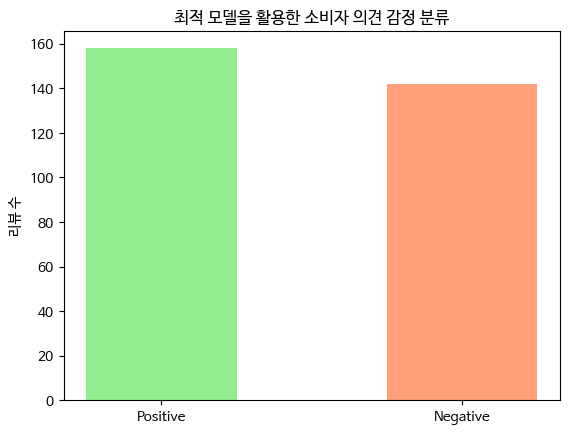

In [ ]:
# Assuming review_pos_df and review_neg_df are two dataframes
# 모델에 학습시킬 데이터 비율 1:1
lengths = [olive_med_labeled_pos_df.shape[0], olive_med_labeled_neg_df.shape[0]]
labels = ['Positive', 'Negative']
colors = ['#90EE90', '#FFA07A']

fig, ax = plt.subplots()
ax.bar(labels, lengths, color=colors, width=0.5)
ax.set_ylabel("리뷰 수")
ax.set_title("최적 모델을 활용한 소비자 의견 감정 분류")

plt.subplots_adjust(wspace=1)

plt.show()

In [ ]:
#olive_med_labeled_pos_df 와 olive_pos_df 합치기
final_pos_df = pd.concat([olive_med_labeled_pos_df,olive_pos_df],ignore_index=True)
#olive_med_labeled_neg_df와 olive_neg_df 합치기
final_neg_df = pd.concat([olive_med_labeled_neg_df,olive_neg_df],ignore_index=True)

In [ ]:
##형태소 분석
import numpy as np
import pandas as pd


In [ ]:
tokenizer = Okt()
#긍정 소비자 의견 토큰화 이후 명사만 추출
final_pos_df['tokenized'] = final_pos_df['reviews'].apply(tokenizer.nouns)
positive_reviews = np.hstack(final_pos_df['tokenized'].values)
#부정 소비자 의견 토큰화 이후 명사만 추출
final_neg_df['tokenized'] = final_neg_df['reviews'].apply(tokenizer.nouns)
negative_reviews = np.hstack(final_neg_df['tokenized'].values)

In [ ]:
final_pos_df['tokenized'] = final_pos_df['reviews'].apply(lambda x: [word for word in tokenizer.nouns(x) if word not in product_stop_words and len(word) > 1])
final_neg_df['tokenized'] = final_neg_df['reviews'].apply(lambda x: [word for word in tokenizer.nouns(x) if word not in product_stop_words and len(word) > 1])

In [ ]:
#긍정 소비자 의견불용어 제거
product_stop_words = ["피부","얼굴","구매","제품","정말","그냥","사용","다른","진짜","정도"]
positive_reviews = [word for word in positive_reviews if len(word) > 1 and word not in product_stop_words]

#부정 소비자 의견불용어 제거
product_stop_words = ["피부","얼굴","구매","제품","정말","그냥","사용","다른","진짜","정도"]
negative_reviews = [word for word in negative_reviews if len(word) > 1 and word not in product_stop_words]


In [ ]:

def modify_counter(word_count):
  word_count["데일리"] = word_count.pop('일리')
  word_count["티트리"] = word_count.pop('트리')
  return word_count


from collections import Counter
from wordcloud import WordCloud
positive_reviews_word_count = Counter(positive_reviews)
modify_counter(positive_reviews_word_count)

pos_word_freq = positive_reviews_word_count.most_common(20)
print(word_freq)


[('마스크', 236), ('진정', 155), ('시트', 141), ('가격', 102), ('수분', 98), ('효과', 91), ('티트리', 88), ('무난', 75), ('에센스', 67), ('보습', 66), ('요즘', 56), ('자주', 50), ('밀착', 49), ('자극', 49), ('가성', 49), ('트러블', 48), ('데일리', 40), ('쓰기', 36), ('후기', 36), ('하나', 35)]


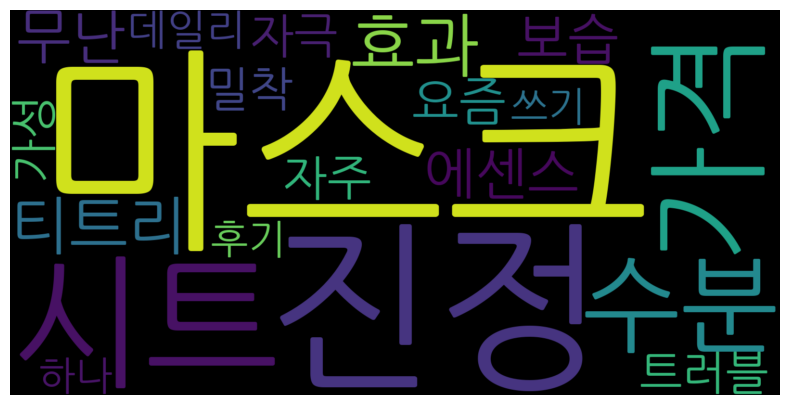

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(width = 1600 , height = 800, font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(dict(pos_word_freq))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file("SVM_긍정 워드클라우드.png")
plt.show()

In [ ]:
from collections import Counter
from wordcloud import WordCloud
negative_reviews_word_count = Counter(negative_reviews)
modify_counter(negative_reviews_word_count)

neg_word_freq = negative_reviews_word_count.most_common(20)
print(neg_word_freq)


[('마스크', 193), ('진정', 162), ('티트리', 151), ('효과', 132), ('에센스', 97), ('리뉴얼', 92), ('느낌', 86), ('시트', 76), ('자극', 75), ('트러블', 69), ('여드름', 54), ('수분', 50), ('흡수', 49), ('다음', 46), ('보습', 43), ('별로', 42), ('조금', 41), ('성분', 39), ('추천', 38), ('밀착', 34)]


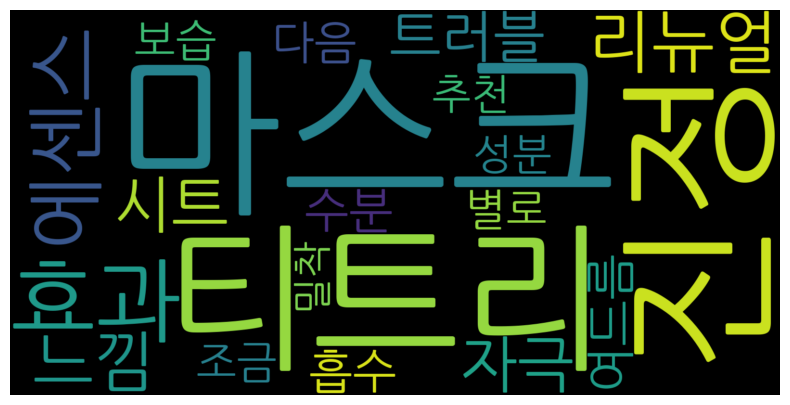

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(width = 1600 , height = 800, font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(dict(neg_word_freq))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file("SVM_부정 워드클라우드.png")
plt.show()

###LDA 활용한 토픽 모델링

In [ ]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim import corpora
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos_lda_list = [token for token in final_pos_df['tokenized']]
neg_lda_list = [token for token in final_neg_df['tokenized']]
print(pos_lda_list,"\n",neg_lda_list)

[['일리', '쓰기', '일리', '쓰기'], ['저렴', '매일', '부담', '저렴', '매일', '부담', '저렴', '매일', '부담'], ['마스크', '지기', '원래', '수분', '잡티', '케어', '도움'], ['콜라겐', '효과', '탄력', '도움', '이건'], ['대박', '흡수', '보습'], ['진정', '재생', '허브', '관리', '효과'], ['진정', '한번', '한번', '효과', '진정', '한번', '한번', '효과', '관리', '관리'], ['에센스', '무난', '밀착', '몇개'], ['유튜브', '지성', '마스크', '하나', '소개', '자극', '여행', '연속', '진정', '다음', '화장'], ['마스크'], ['진정', '병풀', '추출', '물이', '함유', '여름', '야외', '활동', '진정', '도움'], ['인지도', '용감', '트러블', '자극', '무엇', '진정'], ['쟁여', '일리', '가격', '자주', '거의'], ['금액', '기용', '의사'], ['종류', '선택', '무난', '쓰기', '마스크'], ['항상', '무난'], ['결혼식', '아버지', '사드', '매일'], ['수분', '보충', '마스크', '종류'], ['매번', '올리브영', '무난', '가족'], ['마스크', '항상', '이번', '히알루', '론산', '나름', '시트'], ['자주', '이용', '트러블', '촉촉', '자주'], ['마스크', '워낙', '기간', '가격', '여러', '무난', '무난', '추가', '스킨', '케어', '보습', '에센스', '뚝뚝', '지경', '차로', '한번', '흡수'], ['무난', '쓰기', '보습', '무난', '쓰기'], ['매번', '힐팩', '가성', '데카', '사이드', '트리', '이번'], ['종류', '무난', '이건', '불호'], ['자주', '기적'], ['여드름', '진정', '효과', '오히려', '데카', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# "트리"를 "티트리"로 바꾸는 함수
def replace_tree(data_list):
    return [[word.replace('일리', '데일리').replace('트리', '티트리') for word in sublist] for sublist in data_list]

# 각 하위 리스트에 대해 "트리"를 "티트리"로 바꾸기
pos_lda_list = replace_tree(pos_lda_list)
neg_lda_list = replace_tree(neg_lda_list)

# 결과 출력
print(pos_lda_list)

[['데일리', '쓰기', '데일리', '쓰기'], ['저렴', '매일', '부담', '저렴', '매일', '부담', '저렴', '매일', '부담'], ['마스크', '지기', '원래', '수분', '잡티', '케어', '도움'], ['콜라겐', '효과', '탄력', '도움', '이건'], ['대박', '흡수', '보습'], ['진정', '재생', '허브', '관리', '효과'], ['진정', '한번', '한번', '효과', '진정', '한번', '한번', '효과', '관리', '관리'], ['에센스', '무난', '밀착', '몇개'], ['유튜브', '지성', '마스크', '하나', '소개', '자극', '여행', '연속', '진정', '다음', '화장'], ['마스크'], ['진정', '병풀', '추출', '물이', '함유', '여름', '야외', '활동', '진정', '도움'], ['인지도', '용감', '트러블', '자극', '무엇', '진정'], ['쟁여', '데일리', '가격', '자주', '거의'], ['금액', '기용', '의사'], ['종류', '선택', '무난', '쓰기', '마스크'], ['항상', '무난'], ['결혼식', '아버지', '사드', '매일'], ['수분', '보충', '마스크', '종류'], ['매번', '올리브영', '무난', '가족'], ['마스크', '항상', '이번', '히알루', '론산', '나름', '시트'], ['자주', '이용', '트러블', '촉촉', '자주'], ['마스크', '워낙', '기간', '가격', '여러', '무난', '무난', '추가', '스킨', '케어', '보습', '에센스', '뚝뚝', '지경', '차로', '한번', '흡수'], ['무난', '쓰기', '보습', '무난', '쓰기'], ['매번', '힐팩', '가성', '데카', '사이드', '티트리', '이번'], ['종류', '무난', '이건', '불호'], ['자주', '기적'], ['여드름', '진정', '효과', '오히려', '데

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

def lda_modeling(review_prep):
    # 사전 구축
    dictionary = corpora.Dictionary(review_prep)

    # 말뭉치 생성
    corpus = [dictionary.doc2bow(review) for review in review_prep]

    # LDA 모델 학습
    NUM_TOPICS = 5 # 토픽의 수
    PASSES = 10 # 알고리즘이 전체 데이터 세트를 반복하는 횟수
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics=NUM_TOPICS,
                                            id2word=dictionary,
                                            passes=PASSES)
    return model, corpus, dictionary



# LDA 모델링
pos_model, pos_corpus, pos_dictionary = lda_modeling(pos_lda_list)
neg_model, neg_corpus, neg_dictionary = lda_modeling(neg_lda_list)

# 학습된 토픽 출력
print("pos-topic-modeling",pos_model.print_topics())
print("neg-topic-modeling",neg_model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pos-topic-modeling [(0, '0.054*"마스크" + 0.034*"에센스" + 0.028*"가격" + 0.022*"시트" + 0.019*"진정" + 0.018*"수분" + 0.016*"다음" + 0.014*"자극" + 0.014*"매일" + 0.013*"가성"'), (1, '0.047*"티트리" + 0.046*"진정" + 0.042*"효과" + 0.035*"마스크" + 0.021*"시트" + 0.015*"수분" + 0.014*"트러블" + 0.012*"데카" + 0.012*"한번" + 0.012*"여드름"'), (2, '0.074*"시트" + 0.072*"무난" + 0.040*"후기" + 0.029*"수분" + 0.025*"하나" + 0.024*"가성" + 0.023*"크림" + 0.023*"생각" + 0.022*"느낌" + 0.021*"요즘"'), (3, '0.043*"쓰기" + 0.040*"데일리" + 0.027*"보습" + 0.024*"가격" + 0.018*"무난" + 0.017*"부담" + 0.015*"마무리" + 0.015*"요즘" + 0.014*"트러블" + 0.014*"조금"'), (4, '0.087*"마스크" + 0.046*"진정" + 0.032*"가격" + 0.026*"수분" + 0.019*"시트" + 0.019*"보습" + 0.016*"케어" + 0.014*"자극" + 0.013*"밀착" + 0.013*"앰플"')]
neg-topic-modeling [(0, '0.029*"효과" + 0.026*"자극" + 0.022*"느낌" + 0.020*"티트리" + 0.019*"리뉴얼" + 0.018*"진정" + 0.016*"마스크" + 0.014*"트러블" + 0.014*"흡수" + 0.012*"보습"'), (1, '0.036*"마스크" + 0.017*"티트리" + 0.016*"수분" + 0.015*"리뉴얼" + 0.011*"효과" + 0.011*"편이" + 0.010*"성분" + 0.010*"시트" + 0.010*"느낌" + 0.010

In [ ]:
import pyLDAvis.gensim_models


def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # 시각화 결과 저장
    RESULT_FILE = 'lda_result_' + RATING  +'.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'pos'
lda_visualize(pos_model, pos_corpus, pos_dictionary,RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'neg'
lda_visualize(neg_model, neg_corpus, neg_dictionary,RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



열 A와 B에 대한 중복 제거된 데이터 프레임:


,A,B,C
0,1,a,10
1,2,b,20
3,3,c,30
4,4,d,40
